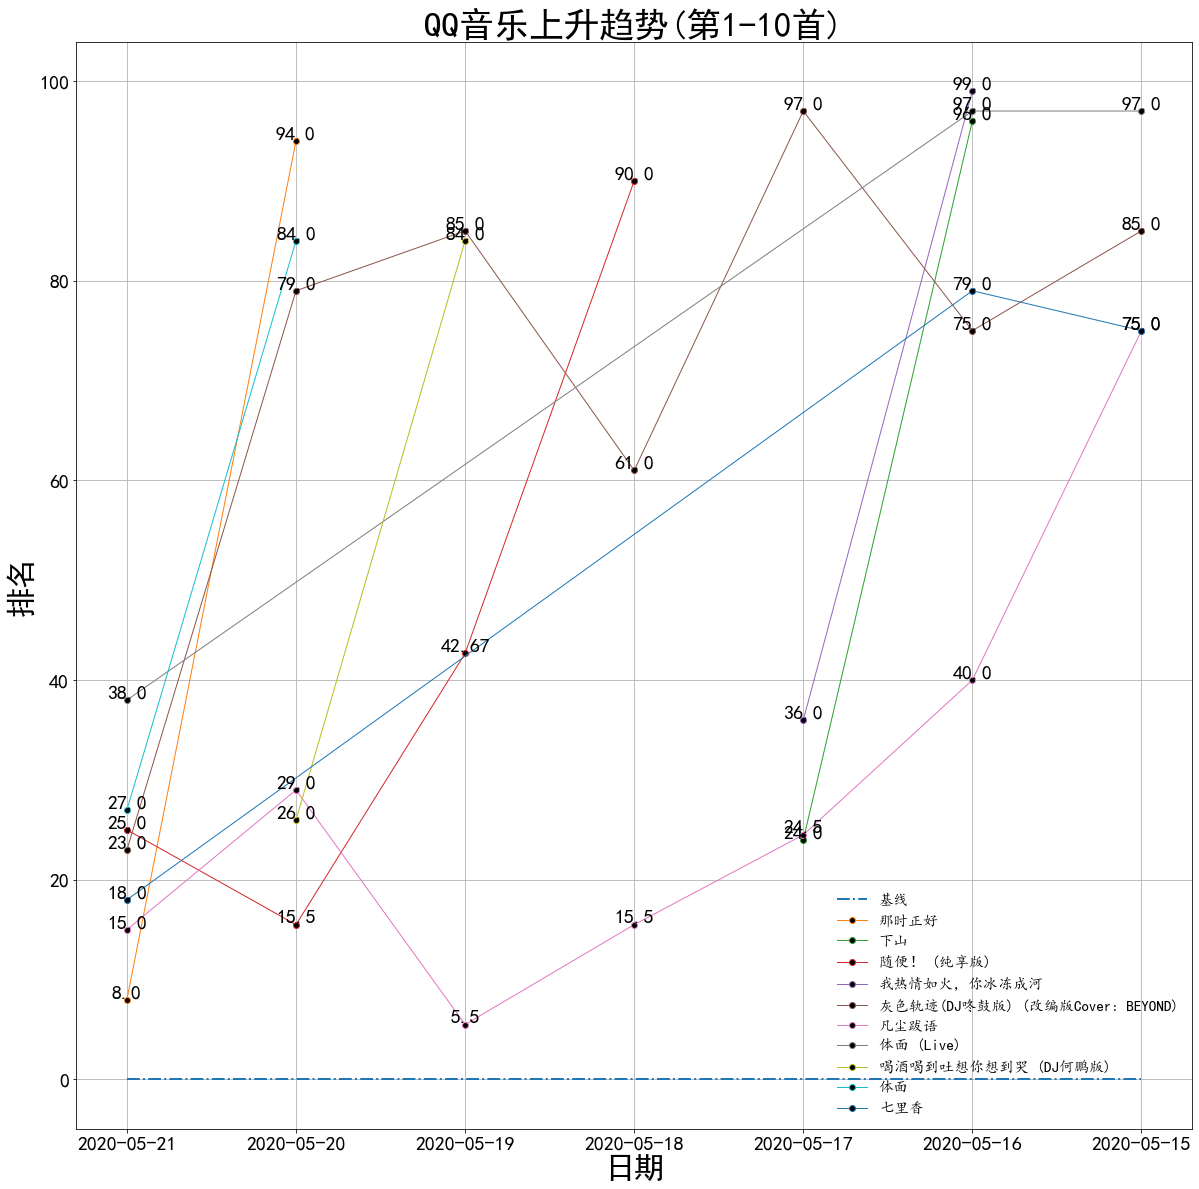

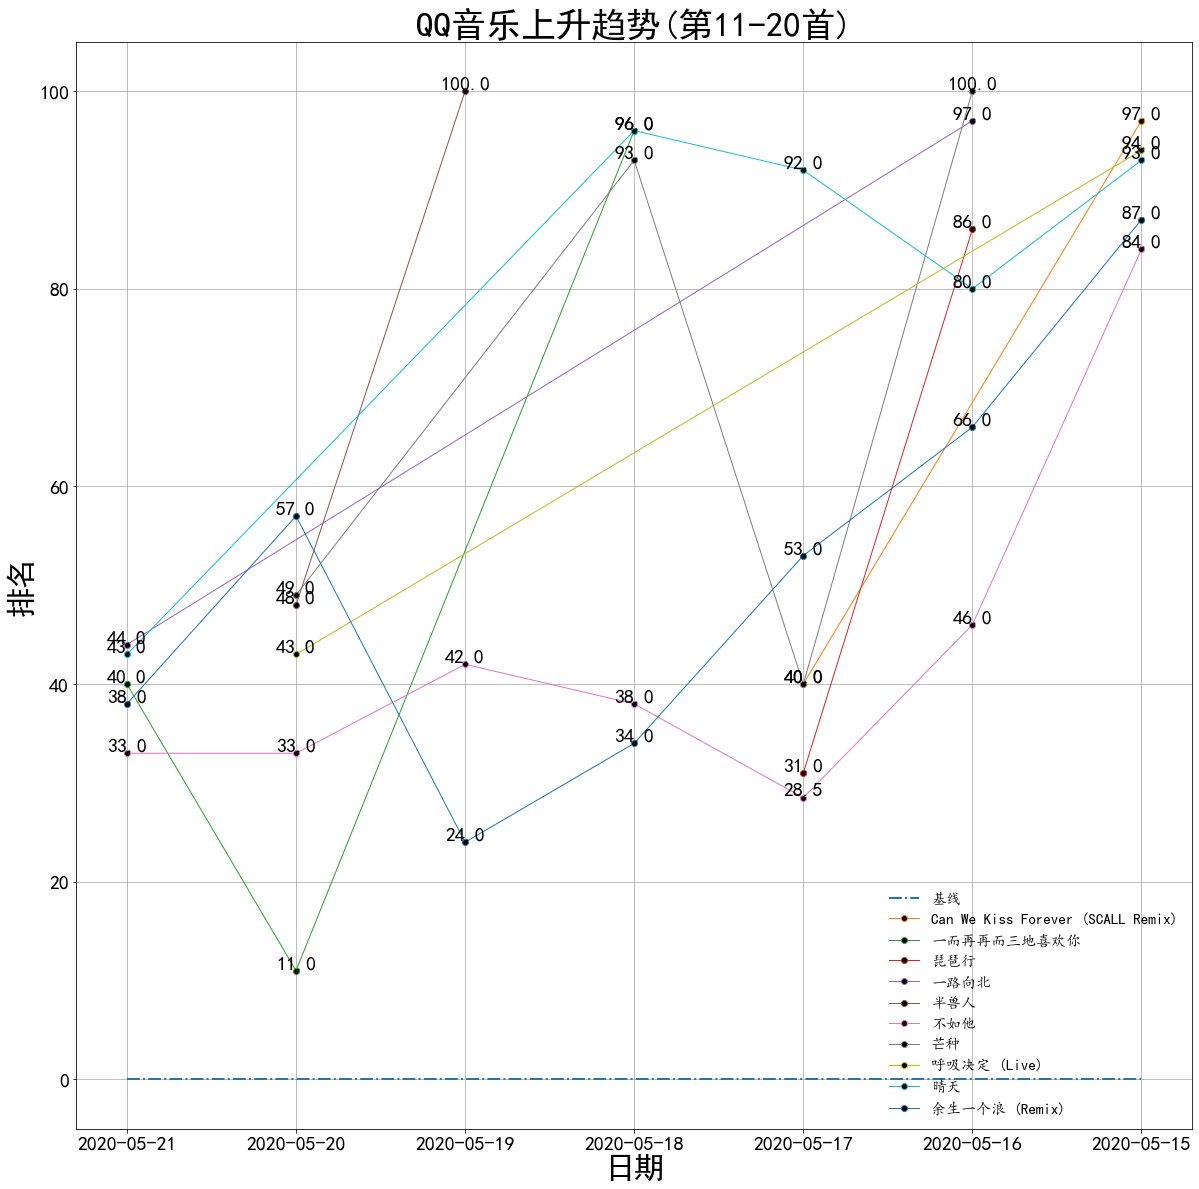

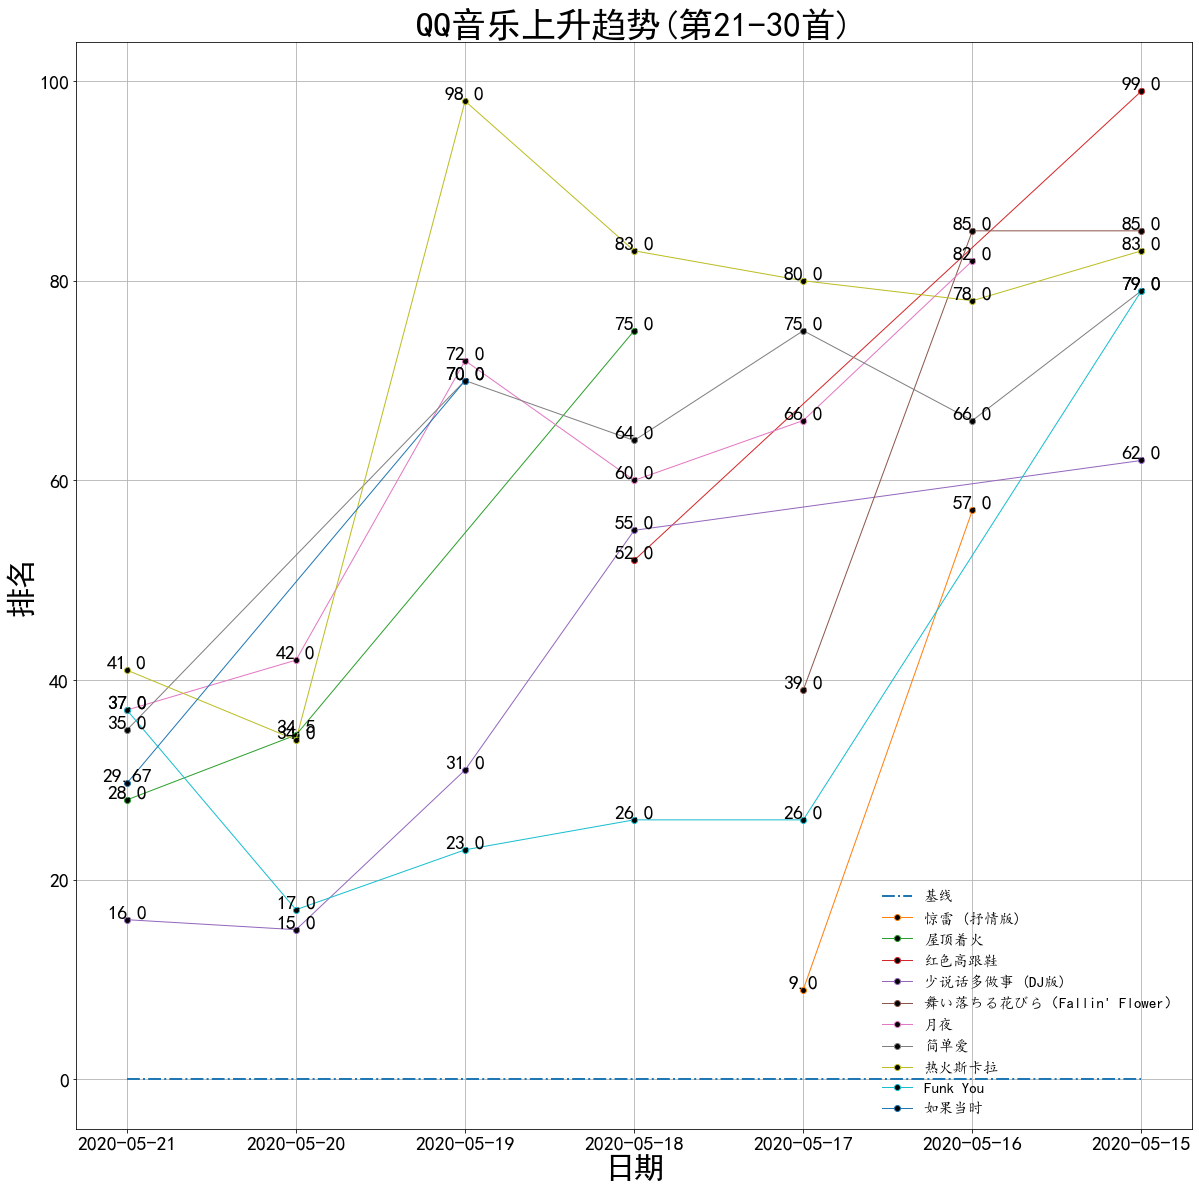

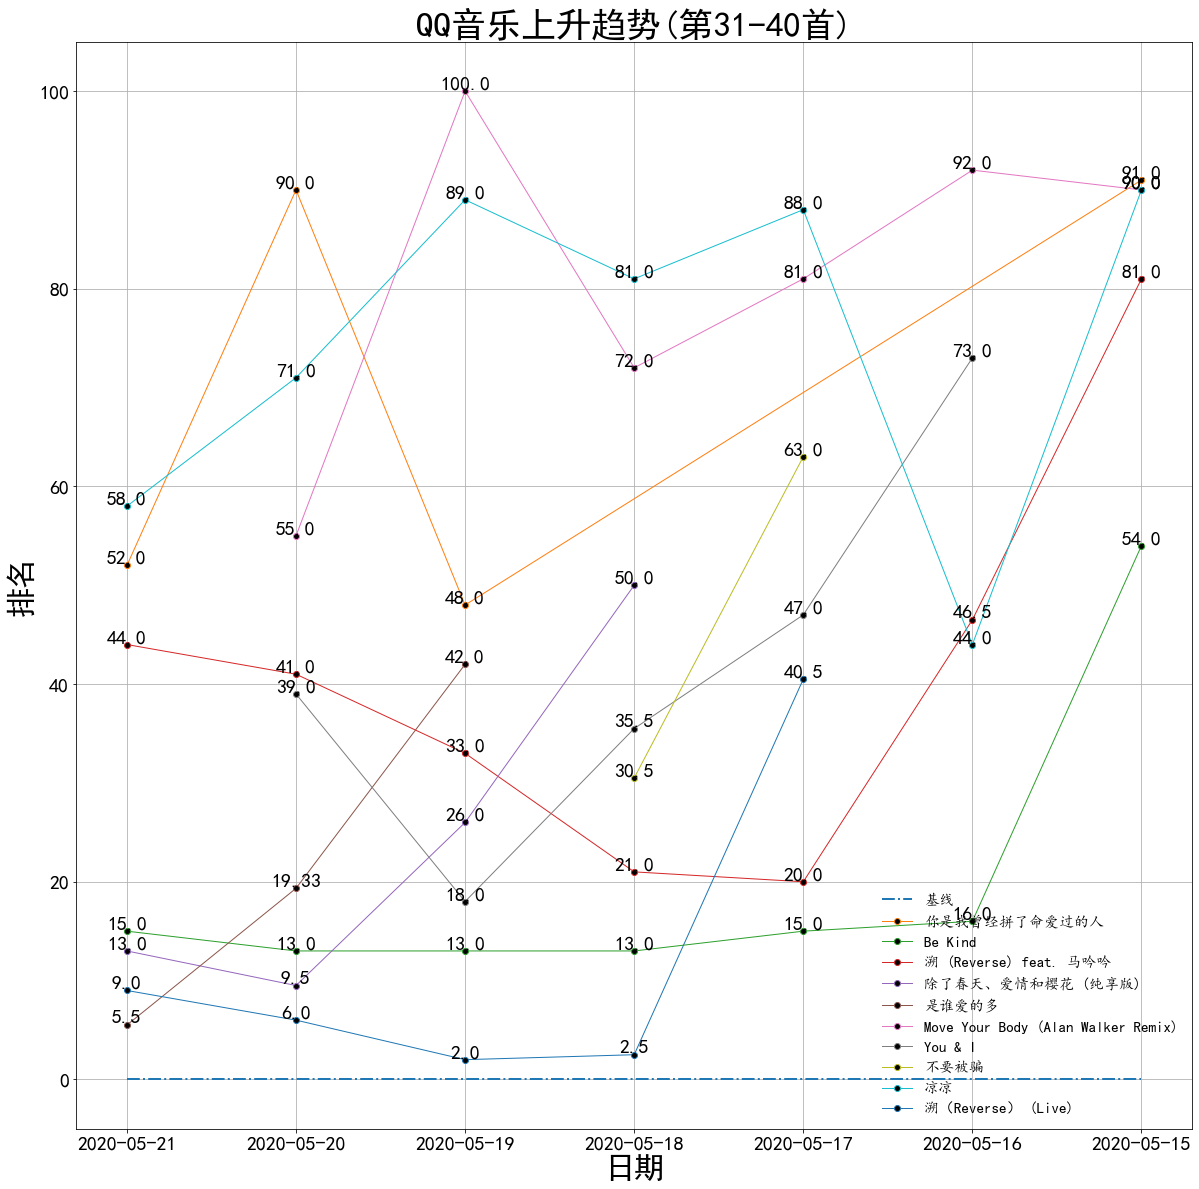

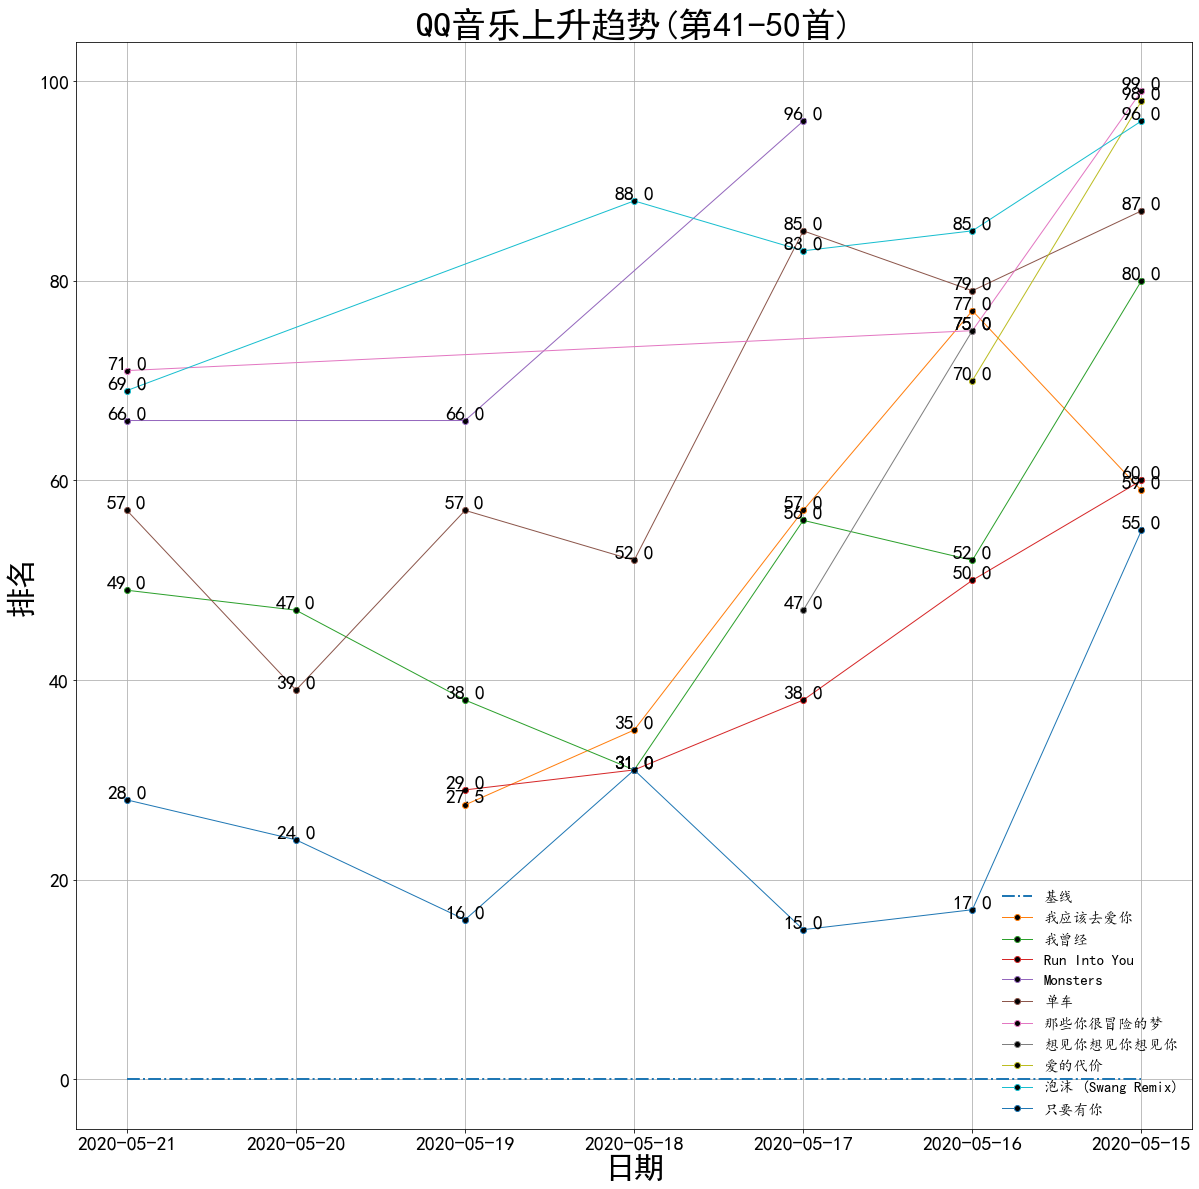

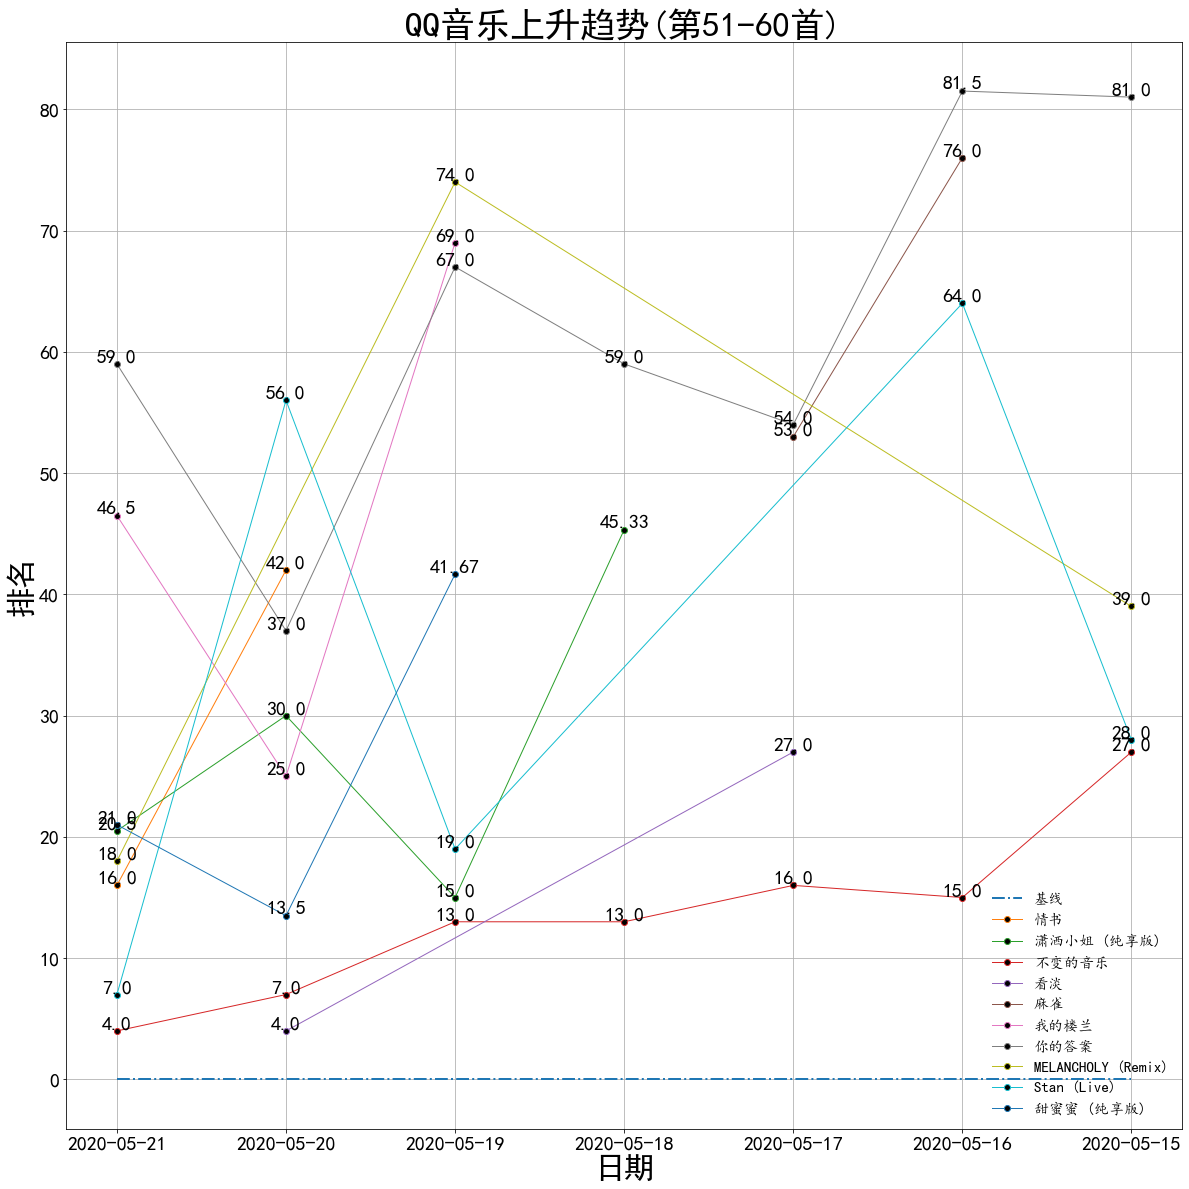

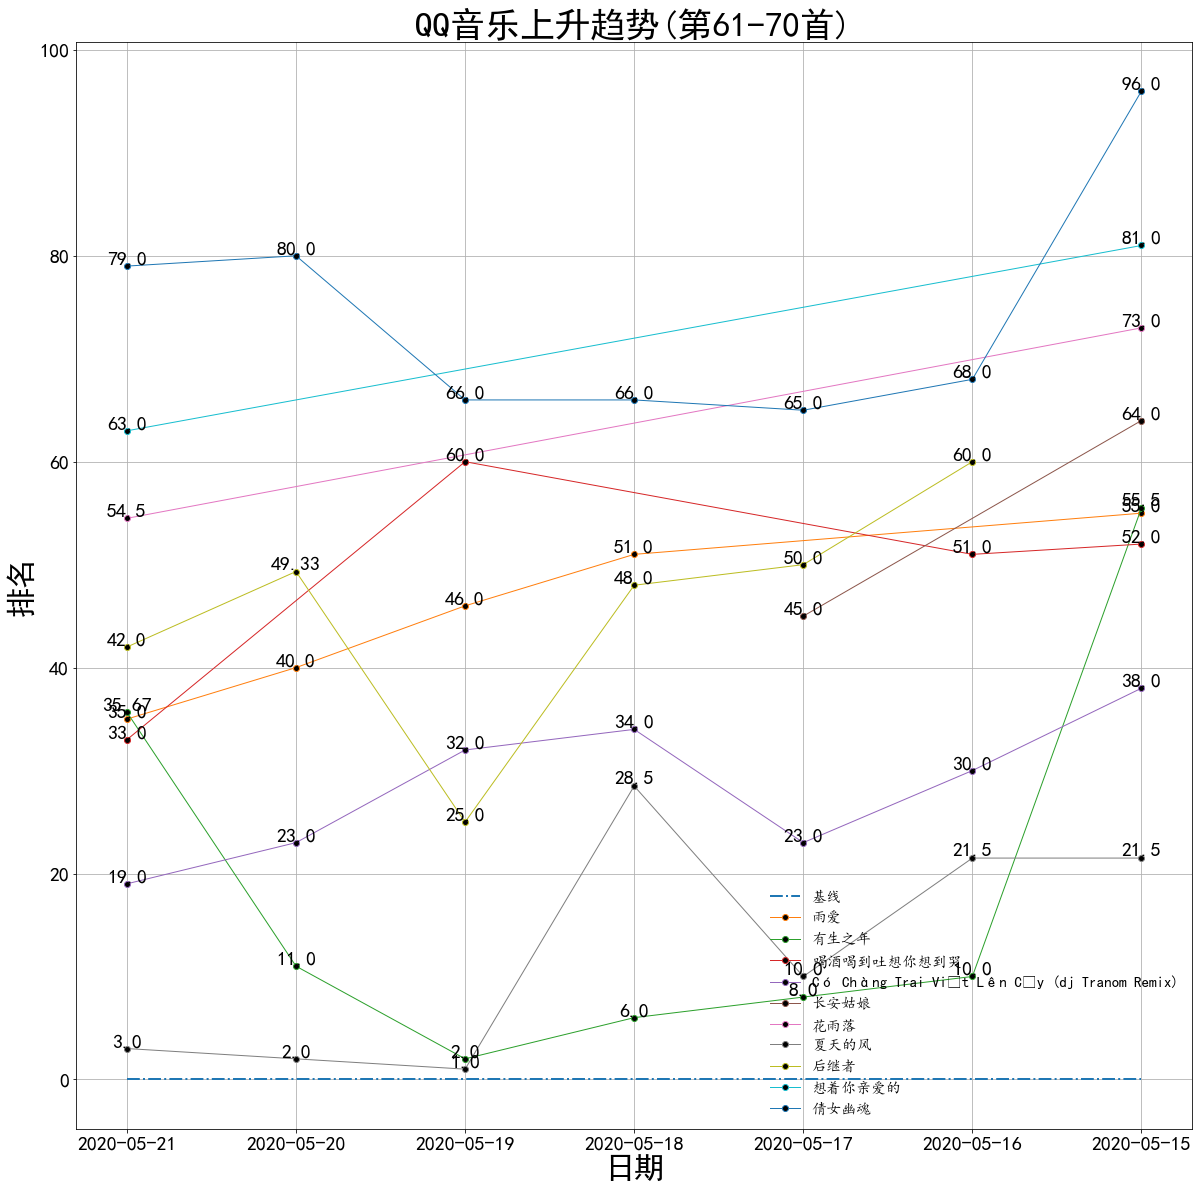

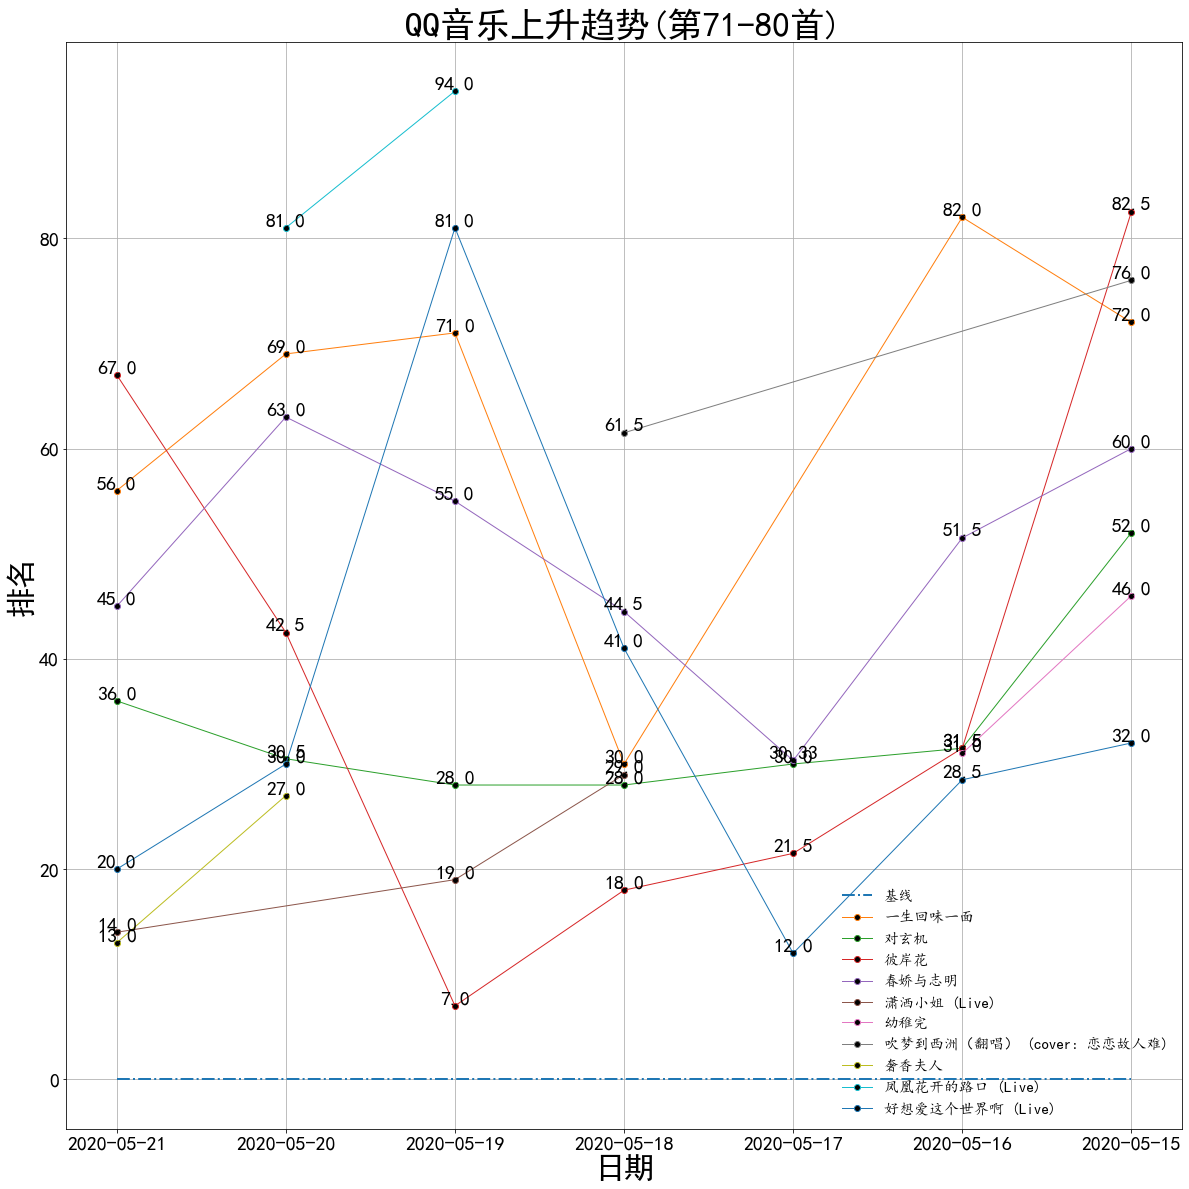

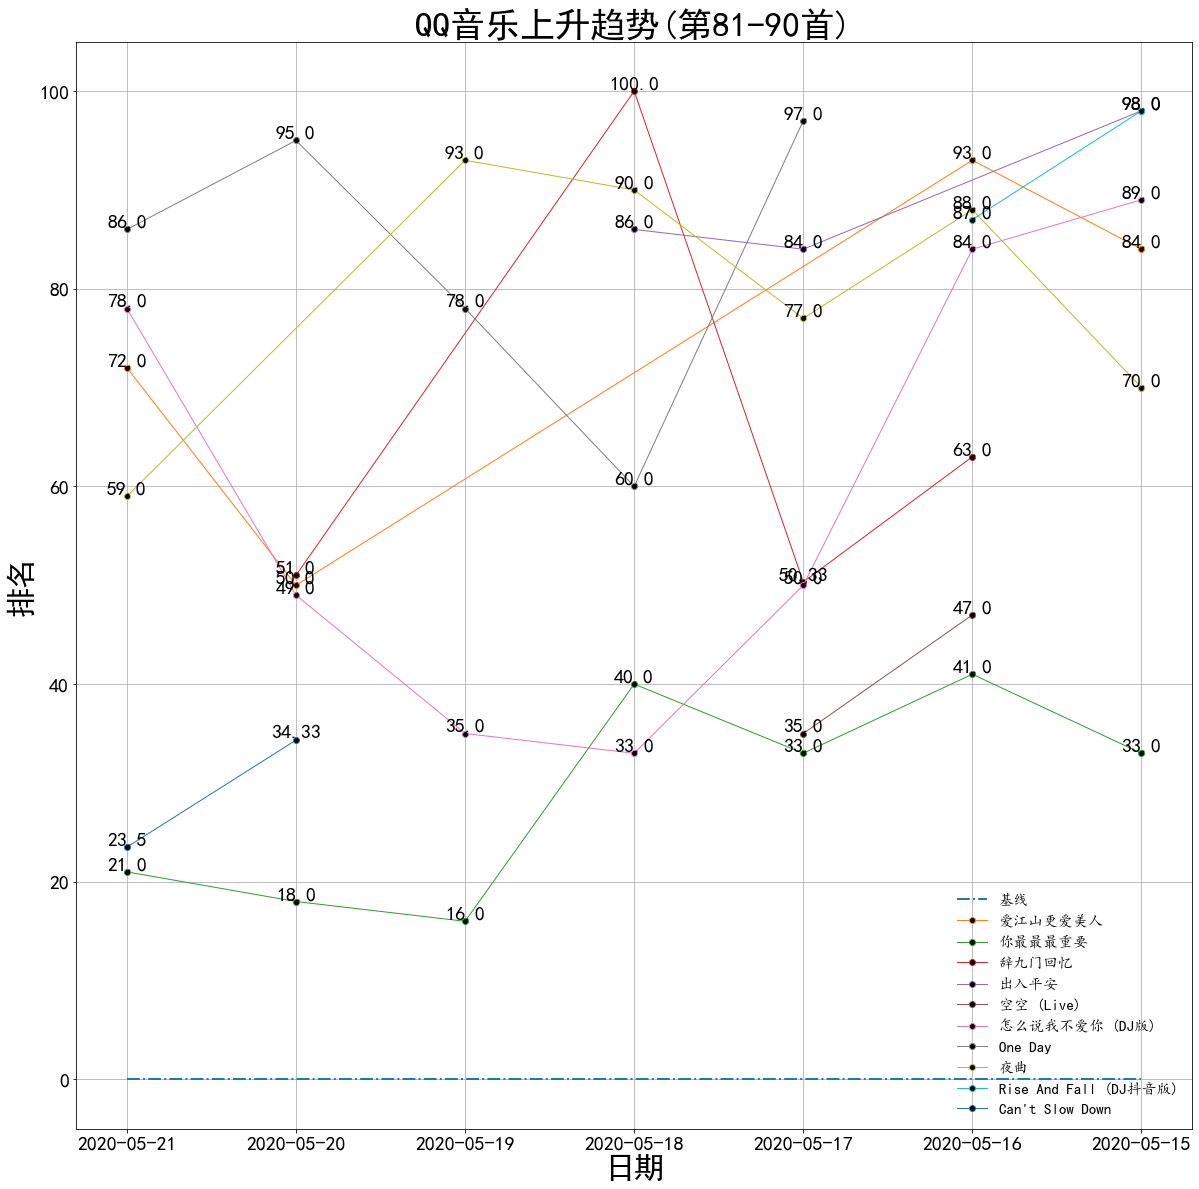

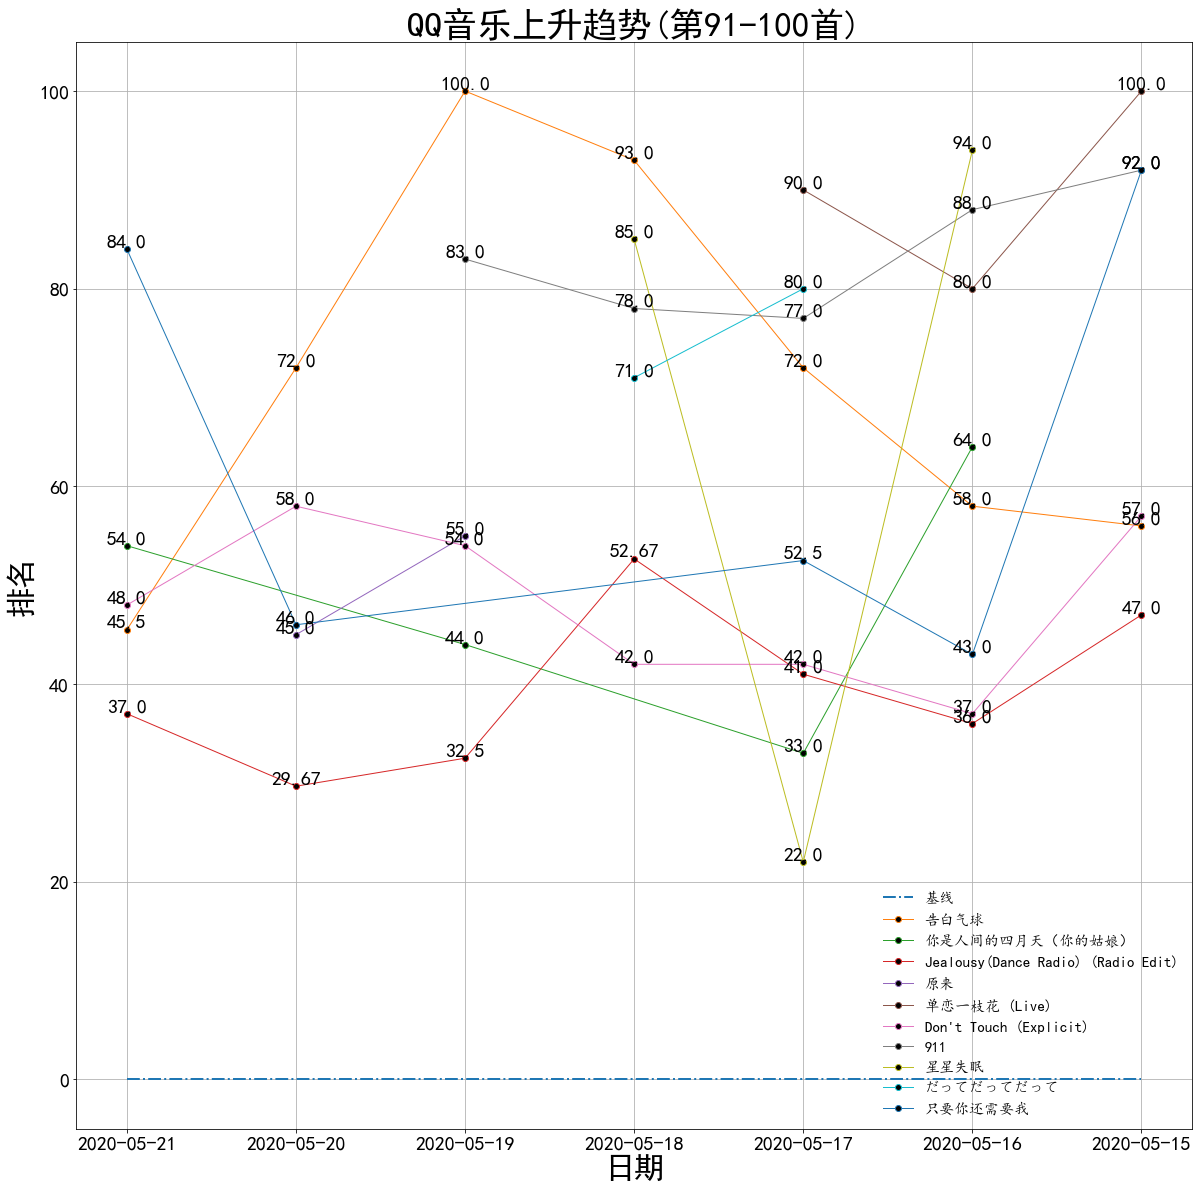

In [6]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties #字体管理器
import matplotlib
import warnings
warnings.filterwarnings("ignore")
for i in range(10):
    # 设置画布大小
    plt.figure(figsize=(20, 20))
    # myfont = fm.FontProperties(fname="字体文件路径")
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)  
    plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签#指定默认字体 SimHei为黑体
    plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
    plt.title("QQ音乐上升趋势(第{}-{}首)".format(i*10+1,(i+1)*10), fontsize=35)  # 设定标题，中文需要指定字体
    plt.grid(True)  # 是否显示网格
    # 设置X轴
    plt.xlabel("日期", fontsize=30)  # 轴标签
    # 设置Y轴
    plt.ylabel("排名", fontsize=30)
    rise_line = plt.plot(now_data_all,[0,0,0,0,0,0,0],linewidth=2.0,linestyle='-.',label='基线')
    for rise_song in rise_dict_order[10*i:10*(i+1)]:
        rise_song_id = rise_song[0]
        # 查询上升最快歌曲的具体信息
        # 获取歌曲的名称等数据
        sql = "select * from [MusicHeat].[dbo].[QQSongs] where ID={}".format(
            rise_song_id)
        # 执行sql语句
        cursor.execute(sql)
        # 取出查询结果
        song_info = cursor.fetchone()
        # 歌曲的具体信息
        SongName = song_info[2]
#         print(SongName)  
        value = songs_dict[rise_song_id]
        date_list = []
        rank_average_list = []
        for date_rank in value:
#             print(date_rank)
            date_list.append(date_rank[0])
            rank_average_list.append(date_rank[1])
        x_data = date_list
        y_data = rank_average_list
        rise_line = plt.plot(x_data,y_data,linewidth=1.0,label=SongName,marker='o',
         markerfacecolor='black', markersize=6)
        # 设置数字标签
        for x, y in zip(x_data, y_data):
            plt.text(x, y,round(y, 2), ha='center', va='bottom', fontsize=20)
#         plt.legend(loc=0,ncol=1,prop=font,loc='lower right')
        plt.legend(ncol=1,prop={'family':'KaiTi','size':15},loc='lower right', frameon=False,shadow=True)
    plt.show()